
Mean Squared Error: 105348071.8830801


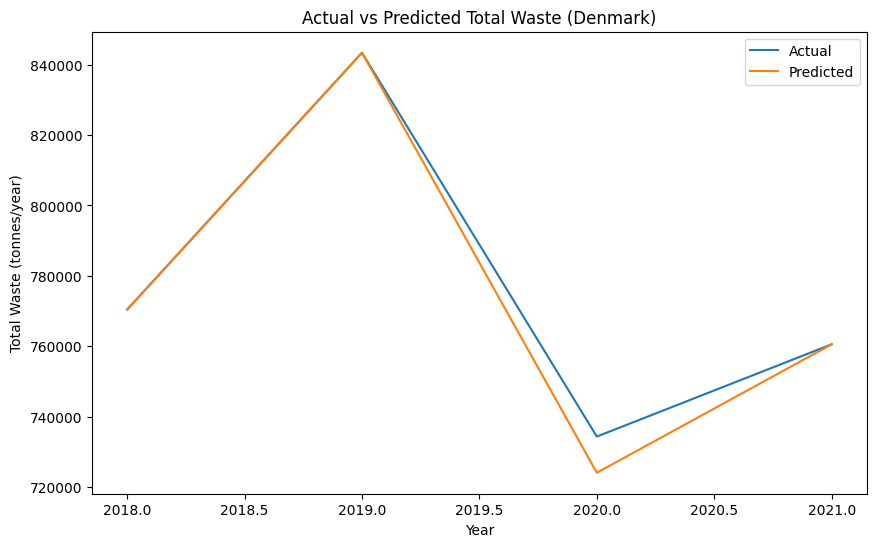


Updated Dataset:
   Country  Year  Household_estimate  Food_service_estimate  Retail_estimate  \
0  Denmark  2021       469449.000000          119134.000000    172003.000000   
1  Denmark  2020       459026.000000          105955.000000    169412.000000   
2  Denmark  2019       526580.000000          129602.000000    187190.000000   
3  Denmark  2018       484827.000000          115392.000000    170221.000000   
4  Denmark  2017       514170.085432          127912.507048    165890.620818   
5  Denmark  2016       465499.647383          107192.616822    166338.562372   
6  Denmark  2022       444361.718083          110186.150291    177918.904023   
7  Denmark  2023       444471.224594          111584.011081    175038.680752   

     total_waste  
0  760586.000000  
1  734393.000000  
2  843372.000000  
3  770440.000000  
4  807973.213298  
5  739030.826577  
6  732466.772398  
7  731093.916428  

Prediction for the next year (2024): 713255.80839227 tonnes

Prediction for the next year

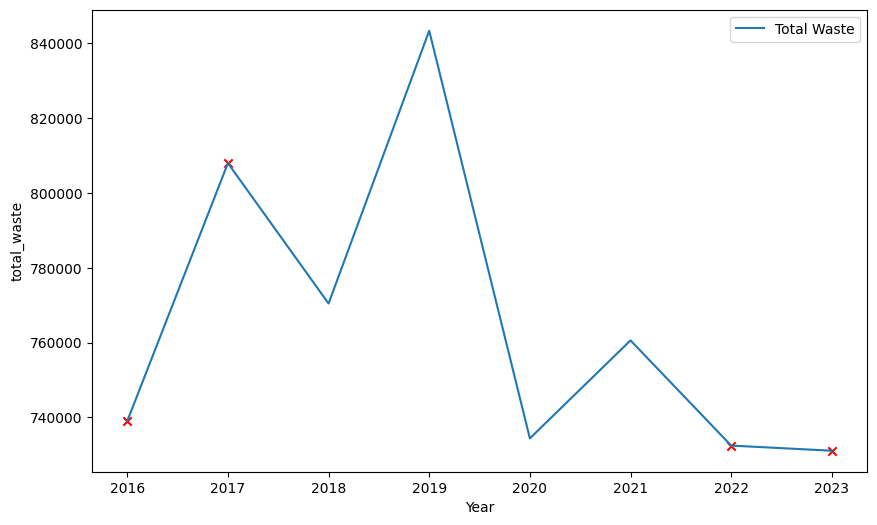

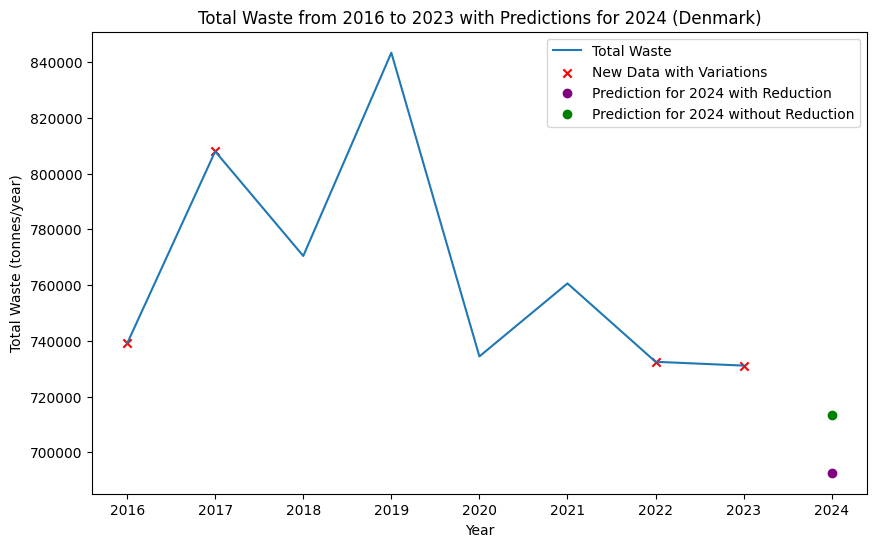

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Function to generate variations
def generate_variation(value):
    variation_percentage = random.uniform(-0.09, 0.09)
    variation = value * variation_percentage
    return value + variation

# Your dataset
data = {
    'Country': ['Denmark', 'Denmark', 'Denmark', 'Denmark'],
    'Year': [2021, 2020, 2019, 2018],
    'Household_estimate': [469449, 459026,526580, 484827],
    'Food_service_estimate': [119134, 105955, 129602, 115392],
    'Retail_estimate': [172003, 169412, 187190, 170221]
}

df_original = pd.DataFrame(data)

# Convert the 'Year' column to numeric format
df_original['Year'] = pd.to_numeric(df_original['Year'])

# Calculate 'total_waste'
df_original['total_waste'] = df_original['Household_estimate'] + df_original['Food_service_estimate'] + df_original['Retail_estimate']

# Split the data into features and target variable
X = df_original[['Year', 'Household_estimate', 'Food_service_estimate']]
y = df_original['total_waste']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Model accuracy evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'\nMean Squared Error: {mse}')

# Visualization of actual and predicted values
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='total_waste', data=df_original, label='Actual')
sns.lineplot(x='Year', y=model.predict(X), data=df_original, label='Predicted')
plt.title('Actual vs Predicted Total Waste (Denmark)')
plt.xlabel('Year')
plt.ylabel('Total Waste (tonnes/year)')
plt.legend()
plt.show()

# Adding data for 2016, 2017, 2022, and 2023 with variations
new_data = {
    'Country': ['Denmark', 'Denmark', 'Denmark', 'Denmark'],
    'Year': [2017, 2016, 2022, 2023],
    'Household_estimate': [generate_variation(df_original['Household_estimate'].mean()) for _ in range(4)],
    'Food_service_estimate': [generate_variation(df_original['Food_service_estimate'].mean()) for _ in range(4)],
    'Retail_estimate': [generate_variation(df_original['Retail_estimate'].mean()) for _ in range(4)]
}

# Adding new data to the existing dataset
df_updated = pd.concat([df_original, pd.DataFrame(new_data)], ignore_index=True)

# Calculate 'total_waste' for the updated dataset
df_updated['total_waste'] = df_updated['Household_estimate'] + df_updated['Food_service_estimate'] + df_updated['Retail_estimate']

# Display the updated dataset with 'total_waste'
print("\nUpdated Dataset:")
print(df_updated)

# Visualization of the updated dataset with 'total_waste'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='total_waste', data=df_updated, label='Total Waste')
plt.scatter(new_data['Year'], df_updated.loc[df_updated['Year'].isin(new_data['Year']), 'total_waste'], color='red', label='New Data with Variations', marker='x')

# Prediction for the next year (2024)
future_data_2024 = {'Country': ['Denmark'], 'Year': [2024], 'Household_estimate': [generate_variation(df_updated['Household_estimate'].mean())], 'Food_service_estimate': [generate_variation(df_updated['Food_service_estimate'].mean())]}
future_df_2024 = pd.DataFrame(future_data_2024)

# Adding the 'reduction_percentage' for 2024
reduction_percentage_2024 = random.uniform(0.05, 0.068)  # assuming it's a random value within the specified range
df_updated.loc[df_updated['Year'] == 2024, 'reduction_percentage'] = reduction_percentage_2024

# Adding the 'total_waste' column to future_df_2024
future_df_2024['total_waste'] = future_df_2024['Household_estimate'] + future_df_2024['Food_service_estimate'] + df_updated[df_updated['Year'] == 2023]['Retail_estimate'].values[0]

# Prediction
future_prediction_2024 = model.predict(future_df_2024[['Year', 'Household_estimate', 'Food_service_estimate']])
print(f'\nPrediction for the next year (2024): {future_prediction_2024[0]} tonnes')

# Prediction for 2024 with waste reduction
future_prediction_2024_with_reduction = df_updated[df_updated['Year'] == 2023]['total_waste'].values[0] * (1 - reduction_percentage_2024)
print(f'\nPrediction for the next year (2024) with waste reduction: {future_prediction_2024_with_reduction} tonnes')

# Adding points for 2024
# Visualizing the updated dataset with 'total_waste'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='total_waste', data=df_updated, label='Total Waste')
plt.scatter(new_data['Year'], df_updated.loc[df_updated['Year'].isin(new_data['Year']), 'total_waste'], color='red', label='New Data with Variations', marker='x')

# Adding points for 2024
plt.scatter(2024, future_prediction_2024_with_reduction, color='purple', label='Prediction for 2024 with Reduction', marker='o')

plt.scatter(2024, future_prediction_2024, color='green', label='Prediction for 2024 without Reduction', marker='o')

plt.title('Total Waste from 2016 to 2023 with Predictions for 2024 (Denmark)')
plt.xlabel('Year')
plt.ylabel('Total Waste (tonnes/year)')
plt.legend()

plt.show()

